# Spotify Song Attributes

Classification model in order to determine if the person will like the song or not based on many song attributes

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,\
    GridSearchCV


np.random.seed(0)

import warnings
from sys import modules

warnings.filterwarnings('ignore')
%matplotlib inline


# Load the Spotify file (data base from Kaggle)

In [167]:
spot = pd.read_csv("data.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
spot.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1


In [168]:
spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null int64
valence             2017 non-null float64
target              2017 non-null int64
dtypes: float64(9), int64(5)
memory usage: 220.7 KB


In [169]:
spot.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000
speechiness,2017.0,0.092664,0.089931,0.023100,0.03750,0.054900,0.108,0.816


In [170]:
spot.apply(pd.Series.nunique)

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
dtype: int64

In [171]:
spot.apply(pd.Series.nunique)

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
dtype: int64

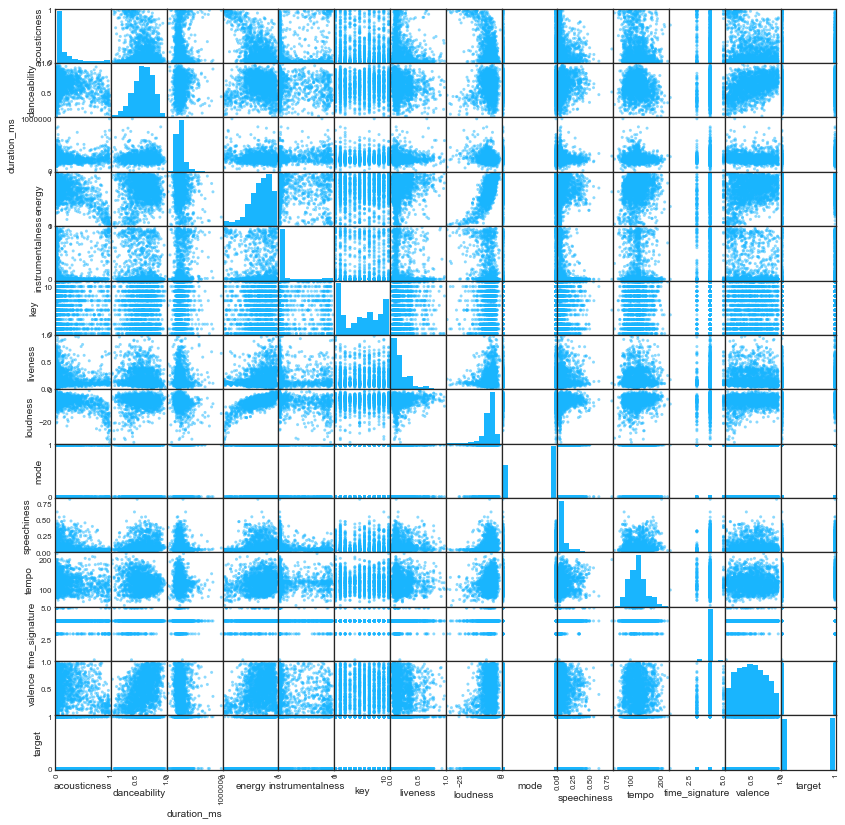

In [172]:
scatter = scatter_matrix(spot, figsize=(14, 14))

## Lets plot the features to see if we can identofy spesific behaivour

In [173]:
#Custom color 
import seaborn as sns
red_blue=['#19B5FE','#EF4836']
palette=sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [174]:
pos_tempo=spot[spot['target']==1]['tempo']
neg_tempo=spot[spot['target']==0]['tempo']
pos_danceability=spot[spot['target']==1]['danceability']
neg_danceability=spot[spot['target']==0]['danceability']
pos_duration=spot[spot['target']==1]['duration_ms']
neg_duration=spot[spot['target']==0]['duration_ms']
pos_loudness=spot[spot['target']==1]['loudness']
neg_loudness=spot[spot['target']==0]['loudness']
pos_speechiness=spot[spot['target']==1]['speechiness']
neg_speechiness=spot[spot['target']==0]['speechiness']
pos_valence=spot[spot['target']==1]['valence']
neg_valence=spot[spot['target']==0]['valence']
pos_acousticness=spot[spot['target']==1]['acousticness']
neg_acousticness=spot[spot['target']==0]['acousticness']
pos_liveness=spot[spot['target']==1]['liveness']
neg_liveness=spot[spot['target']==0]['liveness']
pos_energy=spot[spot['target']==1]['energy']
neg_energy=spot[spot['target']==0]['energy']
pos_key=spot[spot['target']==1]['key']
neg_key=spot[spot['target']==0]['key']
pos_instrumentalness=spot[spot['target']==1]['instrumentalness']
neg_instrumentalness=spot[spot['target']==0]['instrumentalness']

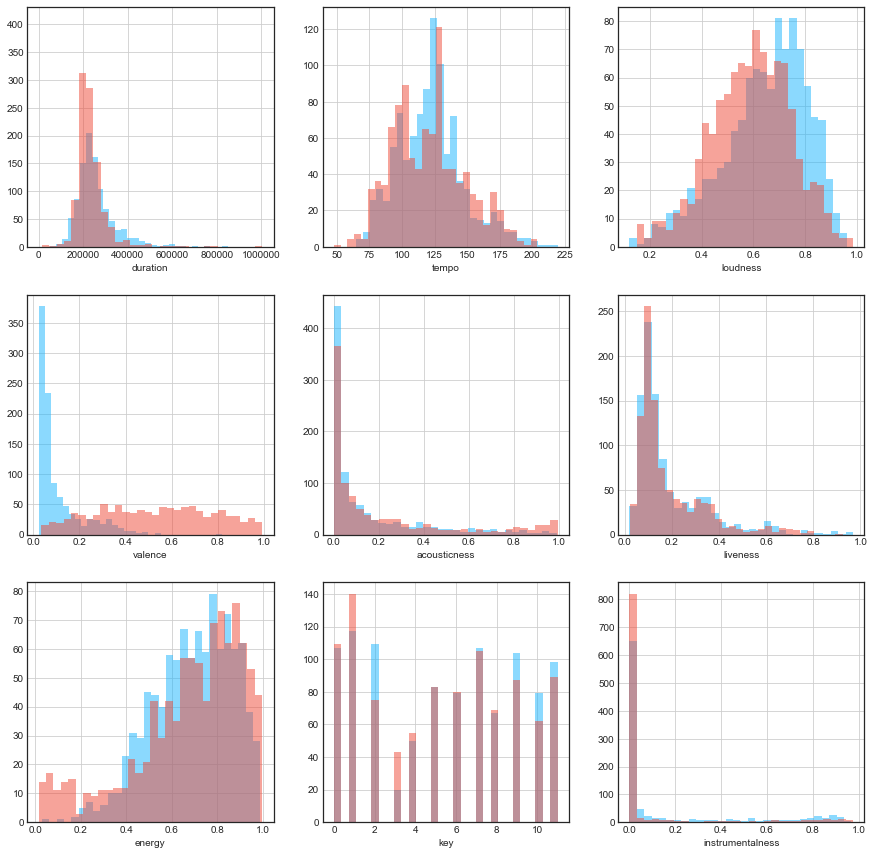

In [175]:
fig2=plt.figure(figsize=(15,15))

#danceability
ax3=fig2.add_subplot(331)
ax3.set_xlabel('danceability')
pos_danceability.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(331)
neg_danceability.hist(alpha=0.5, bins=30)

#tempo
ax3=fig2.add_subplot(332)
ax3.set_xlabel('tempo')
pos_tempo.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(332)
neg_tempo.hist(alpha=0.5, bins=30)

#duration
ax3=fig2.add_subplot(331)
ax3.set_xlabel('duration')
pos_duration.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(331)
neg_duration.hist(alpha=0.5, bins=30)

#loudness
ax3=fig2.add_subplot(333)
ax3.set_xlabel('loudness')
pos_danceability.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(333)
neg_danceability.hist(alpha=0.5, bins=30)

#speechiness
ax3=fig2.add_subplot(334)
ax3.set_xlabel('speechiness')
pos_speechiness.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(331)
neg_speechiness.hist(alpha=0.5, bins=30)

#valence
ax3=fig2.add_subplot(334)
ax3.set_xlabel('valence')
pos_valence.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(331)
neg_valence.hist(alpha=0.5, bins=30)

#acousticness
ax3=fig2.add_subplot(335)
ax3.set_xlabel('acousticness')
pos_acousticness.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(335)
neg_acousticness.hist(alpha=0.5, bins=30)

#liveness
ax3=fig2.add_subplot(336)
ax3.set_xlabel('liveness')
pos_liveness.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(336)
neg_liveness.hist(alpha=0.5, bins=30)

#energy
ax3=fig2.add_subplot(337)
ax3.set_xlabel('energy')
pos_energy.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(337)
neg_energy.hist(alpha=0.5, bins=30)

#key
ax3=fig2.add_subplot(338)
ax3.set_xlabel('key')
pos_key.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)

#instrumentalness
ax3=fig2.add_subplot(339)
ax3.set_xlabel('instrumentalness')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax4=fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

### Now we will make time signature and mode columns to category features using get_dummies

In [176]:
spot['duration_min']=spot['duration_ms']/60000
spot=pd.get_dummies(spot, columns=['time_signature', 'mode'])
spot=spot.drop(['duration_ms'],axis=1)
spot.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,target,duration_min,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_0,mode_1
0,0.0102,0.833,0.434,0.021900,2,0.1650,-8.795,0.4310,150.062,0.286,1,3.410000,0,0,1,0,0,1
1,0.1990,0.743,0.359,0.006110,1,0.1370,-10.401,0.0794,160.083,0.588,1,5.448883,0,0,1,0,0,1
2,0.0344,0.838,0.412,0.000234,2,0.1590,-7.148,0.2890,75.044,0.173,1,3.095117,0,0,1,0,0,1
3,0.6040,0.494,0.338,0.510000,5,0.0922,-15.236,0.0261,86.468,0.230,1,3.323550,0,0,1,0,0,1
4,0.1800,0.678,0.561,0.512000,5,0.4390,-11.648,0.0694,174.004,0.904,1,6.548217,0,0,1,0,1,0


### Lets check if the data in balanced or we have imbalanced data

In [177]:
spot.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

# We can see that target results has an even number of 1 & 0 (more or less)

### we have several features with different scales than the other features and we need to scale them before using those features

In [178]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder

scaler = MinMaxScaler()
spot[['tempo']] = scaler.fit_transform(spot[['tempo']])
spot[['loudness']] = scaler.fit_transform(spot[['loudness']])
spot[['key']] = scaler.fit_transform(spot[['key']])
spot[['duration_min']] = scaler.fit_transform(spot[['duration_min']])

spot.head()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,target,duration_min,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_0,mode_1
0,0.0102,0.833,0.434,0.021900,0.181818,0.1650,0.741141,0.4310,0.596033,0.286,1,0.190735,0,0,1,0,0,1
1,0.1990,0.743,0.359,0.006110,0.090909,0.1370,0.692162,0.0794,0.654474,0.588,1,0.314481,0,0,1,0,0,1
2,0.0344,0.838,0.412,0.000234,0.181818,0.1590,0.791369,0.2890,0.158539,0.173,1,0.171624,0,0,1,0,0,1
3,0.6040,0.494,0.338,0.510000,0.454545,0.0922,0.544709,0.0261,0.225162,0.230,1,0.185488,0,0,1,0,0,1
4,0.1800,0.678,0.561,0.512000,0.454545,0.4390,0.654132,0.0694,0.735659,0.904,1,0.381202,0,0,1,0,1,0


### Lets try to run the model without artist name. We trid   the same model later with this field to check but there is no impact

In [179]:
spot = pd.read_csv("data-spotify.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
spot.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1


In [180]:
#split the data to train and test

X = spot.iloc[:, 0:13]
y = spot.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [181]:
print(len(X_train))
print(len(X_test))

1411
606


# ** Random Forest **

In [182]:
# fit the model: RD
spot_clf = RandomForestClassifier(n_jobs=2,
                                  min_samples_leaf=10, 
                                  max_depth=10,
                                  max_features='auto', 
                                  max_leaf_nodes=None,
                                  n_estimators=10, 
                                  random_state=0)
spot_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Importance 

In [183]:
pd.Series(spot_clf.feature_importances_,
          index=X.columns)

acousticness        0.082895
danceability        0.092440
duration_ms         0.075341
energy              0.118634
instrumentalness    0.204630
key                 0.017503
liveness            0.020314
loudness            0.114000
mode                0.005767
speechiness         0.133464
tempo               0.060744
time_signature      0.002022
valence             0.072246
dtype: float64

# Cross Validation

In [184]:
k = 7
#scores = cross_validate(clf, X_train, y_train, cv=k)
scores = cross_val_score(spot_clf, X_train, y_train, cv=k)

print("Scores : " + (k * "{:.3f} ").format(*scores))
print("Average:", scores.mean())
print("STD:", scores.std())

Scores : 0.812 0.812 0.777 0.738 0.703 0.741 0.715 
Average: 0.7568396701077357
STD: 0.040949814165661146


# Apply the model

In [185]:
y_pred_train = spot_clf.predict(X_train)
y_pred_test = spot_clf.predict(X_test)
print(len(y_pred_train))
y_pred_train

1411


array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

# Asses the model

In [186]:
cm = confusion_matrix(y_train, y_pred_train)
pd.DataFrame(cm,
             index=spot_clf.classes_,
             columns=spot_clf.classes_)

,0,1
0,587,111
1,104,609


In [187]:
print (classification_report(y_train, y_pred_train))

             precision    recall  f1-score   support

          0       0.85      0.84      0.85       698
          1       0.85      0.85      0.85       713

avg / total       0.85      0.85      0.85      1411



In [188]:
print("Accuracy train:" ,(accuracy_score(y_train, y_pred_train)))

Accuracy train: 0.8476257973068746


# Validate the model


In [189]:
cm = confusion_matrix(y_test, y_pred_test)
pd.DataFrame(cm,
             index=spot_clf.classes_,
             columns=spot_clf.classes_)

,0,1
0,235,64
1,76,231


In [190]:
print (classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.76      0.79      0.77       299
          1       0.78      0.75      0.77       307

avg / total       0.77      0.77      0.77       606



In [219]:

RF_cv_std = scores.std()
print('RF cv_std:' ,RF_cv_std)
RF_cv_mean = scores.mean()
print('RF cv_mean:      ' ,RF_cv_mean)
RF_Acc_test= ((accuracy_score(y_test, y_pred_test)))
print('RF Accuracy test:' ,RF_Acc_test)


RF cv_std: 0.040949814165661146
RF cv_mean:       0.7568396701077357
RF Accuracy test: 0.768976897689769


# ROC and AUC

AUC: 0.6422657501116643


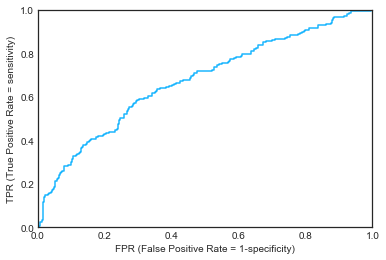

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, spot_clf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)' %  roc_auc_score(y_test, y_pred_test))
#plt.title('ROC')
plt.xlabel('FPR (False Positive Rate = 1-specificity)')
plt.ylabel('TPR (True Positive Rate = sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])

print('AUC:', roc_auc_score(y_test, y_pred_test))


In [ ]:
clf1=y_pred_test

# Logistic Regression

In [221]:
#clf2 Logistic Reg - start
spot = pd.read_csv("data.csv",usecols=[1,2,4,5,8,10,13,14])

In [222]:
X = spot.iloc[:, 0:7]
y = spot.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [223]:
spot_clf = LogisticRegression(C=1000)
spot_clf.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [224]:
k = 7
#scores = cross_validate(clf, X_train, y_train, cv=k)
scores = cross_val_score(spot_clf, X_train, y_train, cv=k)

print("Scores : " + (k * "{:.3f} ").format(*scores))
print("Average:", scores.mean())
print("STD:", scores.std())

Scores : 0.703 0.713 0.624 0.703 0.644 0.607 0.625 
Average: 0.6597291125701056
STD: 0.041591106031971366


In [225]:
y_pred_train = spot_clf.predict(X_train)
y_pred_test = spot_clf.predict(X_test)

In [226]:
LR_cv_std = scores.std()
print('LR cv_std:' ,LR_cv_std)
LR_cv_mean = scores.mean()
print('LR cv_mean:      ' ,LR_cv_mean)
LR_Acc_test= ((accuracy_score(y_test, y_pred_test)))
print('LR Accuracy test:' ,LR_Acc_test)

LR cv_std: 0.041591106031971366
LR cv_mean:       0.6597291125701056
LR Accuracy test: 0.641914191419142


In [228]:
#clf2 Logistic Reg - End
clf2=y_pred_test

# Naive Bayes

In [229]:
#clf3 Naive Bayes - Start
spot = pd.read_csv("data.csv",usecols=[1,2,4,5,8,10,13,14])

In [230]:
X = spot.iloc[:, 0:7]
y = spot.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [231]:
spot_clf = GaussianNB()
spot_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [233]:
k = 7
#scores = cross_validate(clf, X_train, y_train, cv=k)
scores = cross_val_score(spot_clf, X_train, y_train, cv=k)

print("Scores : " + (k * "{:.3f} ").format(*scores))
print("Average:", scores.mean())
print("STD:", scores.std())

Scores : 0.703 0.673 0.634 0.634 0.584 0.607 0.570 
Average: 0.6292411352009403
STD: 0.04383669243842769


In [101]:
y_pred_train = spot_clf.predict(X_train)
y_pred_test = spot_clf.predict(X_test)

In [234]:
NB_cv_std = scores.std()
print('NB cv_std:' ,NB_cv_std)
NB_cv_mean = scores.mean()
print('NB cv_mean:      ' ,NB_cv_mean)
NB_Acc_test= ((accuracy_score(y_test, y_pred_test)))
print('NB Accuracy test:' ,NB_Acc_test)

NB cv_std: 0.04383669243842769
NB cv_mean:       0.6292411352009403
NB Accuracy test: 0.641914191419142


In [103]:
#clf3 Naive Bayes - End
clf3=y_pred_test

# Decision Tree

In [237]:
#clf4 Decision Tree - Start
spot = pd.read_csv("data.csv",usecols=[2,4,5,8,10,13,14])

In [238]:
X = spot.iloc[:, 0:6]
y = spot.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [239]:
spot_clf = DecisionTreeClassifier(max_depth=5,min_samples_split=10, min_samples_leaf=10)

In [240]:
spot_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [241]:
k = 7
#scores = cross_validate(clf, X_train, y_train, cv=k)
scores = cross_val_score(spot_clf, X_train, y_train, cv=k)

print("Scores : " + (k * "{:.3f} ").format(*scores))
print("Average:", scores.mean())
print("STD:", scores.std())

Scores : 0.723 0.767 0.752 0.693 0.713 0.716 0.705 
Average: 0.7242761088475584
STD: 0.024460064367891478


In [242]:
y_pred_train = spot_clf.predict(X_train)
y_pred_test = spot_clf.predict(X_test)

In [243]:
DT_cv_std = scores.std()
print('DT cv_std:' ,DT_cv_std)
DT_cv_mean = scores.mean()
print('DT cv_mean:      ' ,DT_cv_mean)
DT_Acc_test= ((accuracy_score(y_test, y_pred_test)))
print('DT Accuracy test:' ,DT_Acc_test)

DT cv_std: 0.024460064367891478
DT cv_mean:       0.7242761088475584
DT Accuracy test: 0.7673267326732673


In [110]:
#clf4 Decision Tree - End
clf4 = y_pred_test

# SVM

In [245]:
#clf4 SVM - Start
spot = pd.read_csv("data.csv",usecols=[1,2,4,5,8,10,13,14])

In [246]:
X = spot.iloc[:, 0:7]
y = spot.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [247]:
spot_clf = svm.SVC(kernel='rbf', C=10000, gamma=2**-5, probability = True)
spot_clf.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [248]:
k = 7
#scores = cross_validate(clf, X_train, y_train, cv=k)
scores = cross_val_score(spot_clf, X_train, y_train, cv=k)

print("Scores : " + (k * "{:.3f} ").format(*scores))
print("Average:", scores.mean())
print("STD:", scores.std())

Scores : 0.728 0.757 0.728 0.708 0.703 0.706 0.710 
Average: 0.7200328625613094
STD: 0.01788456356844277


In [249]:
y_pred_train = spot_clf.predict(X_train)
y_pred_test = spot_clf.predict(X_test)

In [250]:
SVM_cv_std = scores.std()
print('SVM cv_std:' ,SVM_cv_std)
SVM_cv_mean = scores.mean()
print('SVM cv_mean:      ' ,SVM_cv_mean)
SVM_Acc_test= ((accuracy_score(y_test, y_pred_test)))
print('SVM Accuracy test:' ,SVM_Acc_test)

SVM cv_std: 0.01788456356844277
SVM cv_mean:       0.7200328625613094
SVM Accuracy test: 0.7244224422442245


In [116]:
#clf5 SVM - End
clf5 = y_pred_test

# Knn

In [294]:
#clf6 Knn - Start
spot = pd.read_csv("data.csv",usecols=[2,3,4,5,8,10,13,14])

In [295]:
X = spot.iloc[:, 0:7]
y = spot.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Using a scaler

In [296]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [297]:
k = 65
spot_clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
spot_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=65, p=2,
           weights='uniform')

In [298]:
k_cv = 7
#scores = cross_validate(clf, X_train, y_train, cv=k)
scores = cross_val_score(spot_clf, X_train, y_train, cv=k)

print("Scores : " + (k_cv * "{:.3f} ").format(*scores))
print("Average:", scores.mean())
print("STD:", scores.std())

Scores : 0.636 0.500 0.909 0.591 0.727 0.773 0.727 
Average: 0.6842357642357643
STD: 0.09728609282210818


In [299]:
y_pred_train = spot_clf.predict(X_train)
y_pred_test = spot_clf.predict(X_test)

In [304]:
k_var_sum=[]
for k in range(1,100,2):
    spot_clf = KNeighborsClassifier(n_neighbors=k)
    spot_clf.fit(X_train, y_train)
    y_pred_test = spot_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    k_var_sum.append((k,accuracy))
two_d_array = np.vstack(k_var_sum)
print(two_d_array)
print("Max accuracy:", max(two_d_array[:,1]))


[[ 1.          0.59570957]
 [ 3.          0.60891089]
 [ 5.          0.6320132 ]
 [ 7.          0.65181518]
 [ 9.          0.64026403]
 [11.          0.65016502]
 [13.          0.65841584]
 [15.          0.65511551]
 [17.          0.65676568]
 [19.          0.66171617]
 [21.          0.66336634]
 [23.          0.67161716]
 [25.          0.67161716]
 [27.          0.67656766]
 [29.          0.67161716]
 [31.          0.67326733]
 [33.          0.68811881]
 [35.          0.67821782]
 [37.          0.67161716]
 [39.          0.68316832]
 [41.          0.67491749]
 [43.          0.68646865]
 [45.          0.67821782]
 [47.          0.68316832]
 [49.          0.67986799]
 [51.          0.68976898]
 [53.          0.68976898]
 [55.          0.68811881]
 [57.          0.68151815]
 [59.          0.68151815]
 [61.          0.69306931]
 [63.          0.69471947]
 [65.          0.70132013]
 [67.          0.69966997]
 [69.          0.69471947]
 [71.          0.69306931]
 [73.          0.69141914]
 

# Accuracy changes by K - Knn

Text(0,0.5,'accuracy')

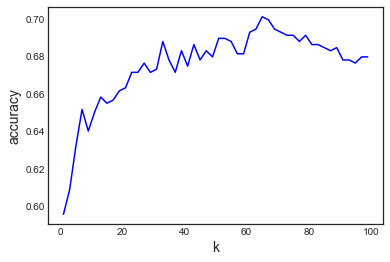

In [360]:
# plt.scatter(*two_d_array.T)   
plt.plot(two_d_array[:, 0], two_d_array[:, 1], color='b')
plt.xlabel('k', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
#plt.title("Accuracy vs. k - Test", fontsize=18)

In [306]:
Knn_cv_std = scores.std()
print('Knn cv_std:' ,Knn_cv_std)
Knn_cv_mean = scores.mean()
print('Knn cv_mean:      ' ,Knn_cv_mean)
Knn_Acc_test= ((accuracy_score(y_test, y_pred_test)))
print('Knn Accuracy test:' ,Knn_Acc_test)

Knn cv_std: 0.09728609282210818
Knn cv_mean:       0.6842357642357643
Knn Accuracy test: 0.6798679867986799


In [308]:
#clf6 Knn - End
clf6=y_pred_test

In [327]:
All_cv_std = [RF_cv_std, LR_cv_std, NB_cv_std, DT_cv_std, SVM_cv_std, Knn_cv_std]

In [328]:
All_cv_mean = [RF_cv_mean, LR_cv_mean, NB_cv_mean, DT_cv_mean, SVM_cv_mean, Knn_cv_mean]

In [330]:
All_Acc_test = [RF_Acc_test, LR_Acc_test, NB_Acc_test, DT_Acc_test, SVM_Acc_test, Knn_Acc_test]

In [333]:
models = ['RF','LR','NB','DT','SVM','Knn']

# Models Cross validation STD's

<Container object of 6 artists>

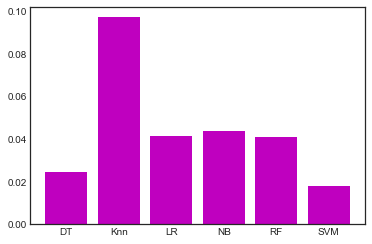

In [338]:
plt.bar(models, All_cv_std, color='m')

# Models competition - Accuracy test  vs CV mean by models

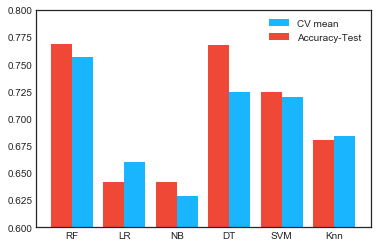

In [403]:
ypos=np.arange(len(models))
plt.xticks(ypos, models)
plt.bar(ypos+0.2, All_cv_mean, width=0.4, label='CV mean')
plt.bar(ypos-0.2, All_Acc_test, width=0.4, label='Accuracy-Test')
axes = plt.gca()
axes.set_ylim([0.6, 0.8])
plt.legend()
#plt.title('Accuracy-Test vs CV mean')

# Sum of votings for each sample

In [309]:
sum_clf=(clf1+clf2+clf3+clf4+clf5+clf6)
print(sum_clf)

[3 5 6 6 2 4 3 6 6 2 1 5 6 2 1 1 3 6 4 1 2 0 0 6 0 5 6 3 0 2 3 6 6 6 6 0 2
 3 5 4 4 2 0 5 6 0 0 6 0 1 6 6 0 0 1 0 4 6 0 6 6 0 6 5 6 6 1 3 1 6 2 3 0 2
 6 1 6 1 0 0 0 4 1 4 0 4 0 0 0 1 4 4 6 0 1 1 3 6 1 6 0 6 1 0 0 3 2 0 6 6 6
 5 0 3 5 0 6 5 2 6 1 0 3 3 1 6 2 6 4 2 0 6 6 4 6 3 0 6 1 6 4 0 6 0 0 6 3 3
 0 0 6 3 6 2 2 1 6 2 6 5 6 6 2 2 1 0 5 0 4 3 1 0 3 2 0 0 6 2 3 4 2 6 3 4 1
 0 0 6 0 1 3 1 0 0 2 6 1 1 0 4 3 5 5 2 6 3 3 0 4 0 2 6 6 0 2 5 1 3 0 1 0 1
 0 6 2 0 6 6 4 5 2 4 6 1 3 3 6 5 1 6 5 6 6 1 6 4 1 0 3 5 4 6 3 6 4 0 4 3 0
 0 6 6 2 0 0 1 6 4 0 0 6 4 0 0 6 2 4 0 0 1 0 0 1 0 0 0 4 5 0 1 0 2 2 6 2 0
 1 0 1 5 0 6 6 6 0 2 1 2 6 3 5 1 3 1 2 0 6 2 4 0 0 0 5 3 0 3 1 1 1 6 1 5 0
 2 0 6 6 0 1 0 6 1 6 6 1 0 1 3 6 4 6 0 5 3 3 0 1 1 2 2 6 3 5 0 1 1 4 1 1 0
 1 4 3 2 0 6 1 0 0 6 1 1 3 0 5 4 3 5 2 6 6 2 0 6 6 4 6 4 0 1 4 1 3 0 0 6 4
 5 1 6 0 4 4 3 1 6 6 1 5 6 4 4 0 1 1 1 1 2 4 0 1 1 0 1 6 3 6 2 4 4 6 4 0 4
 6 6 2 6 1 1 2 0 4 0 2 0 0 6 6 5 0 6 3 0 6 2 2 2 1 0 0 1 2 5 2 6 4 6 6 4 6
 6 6 1 2 0 0 0 3 0 5 1 0 

# The distribution of Votings  

([<matplotlib.axis.XTick at 0x1ff399c04a8>,
 <a list of 7 Text xticklabel objects>)

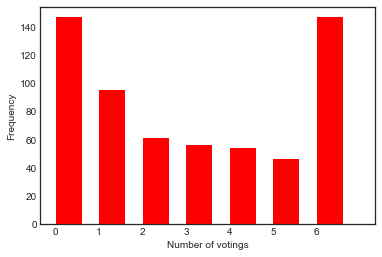

In [310]:
bins=[0,1,2,3,4,5,6,7]
plt.hist(sum_clf, bins, histtype='bar', width=0.6, color='red')
plt.xlabel("Number of votings")
plt.ylabel("Frequency")
plt.xticks([0,1,2,3,4,5,6])
#plt.title("The distribution of Votings ")

In [311]:
df0=pd.DataFrame(y_test)
df1=pd.DataFrame(clf1, columns=['RF'])
df2=pd.DataFrame(clf2, columns=['LR'])
df3=pd.DataFrame(clf3, columns=['NB'])
df4=pd.DataFrame(clf4, columns=['DT'])
df5=pd.DataFrame(clf5, columns=['SVM'])
df6=pd.DataFrame(clf6, columns=['Knn'])
sum_clf=pd.DataFrame(sum_clf, columns=['SUM'])

results = pd.concat([df1,df2,df3,df4,df5,df6,sum_clf], axis=1)

#join y_test, and it's indexing with results
df_all=df0.reset_index(drop=True).join(results).set_index(df0.index)
df_all.head(10)

,target,RF,LR,NB,DT,SVM,Knn,SUM
145,1,1,0,0,1,1,0,3
557,1,1,1,1,1,0,1,5
240,1,1,1,1,1,1,1,6
893,1,1,1,1,1,1,1,6
1518,0,1,0,0,1,0,0,2
1145,0,1,1,1,0,1,0,4
578,1,0,0,1,0,1,1,3
76,1,1,1,1,1,1,1,6
310,1,1,1,1,1,1,1,6
989,1,1,0,0,1,0,0,2


In [312]:
df_all['Voting'] = np.where(df_all['SUM']>=3, 1, 0)
voting_output = df_all['Voting']
#df['color'] = np.where(df['Set']=='Z', 'green', 'red')

In [313]:
df_all.head(10)

,target,RF,LR,NB,DT,SVM,Knn,SUM,Voting
145,1,1,0,0,1,1,0,3,1
557,1,1,1,1,1,0,1,5,1
240,1,1,1,1,1,1,1,6,1
893,1,1,1,1,1,1,1,6,1
1518,0,1,0,0,1,0,0,2,0
1145,0,1,1,1,0,1,0,4,1
578,1,0,0,1,0,1,1,3,1
76,1,1,1,1,1,1,1,6,1
310,1,1,1,1,1,1,1,6,1
989,1,1,0,0,1,0,0,2,0


# Voting summary 

# This is the score of voting for at least 3 votes per smaple -  from the 6 models

In [314]:
print(accuracy_score(y_test, voting_output))

0.7491749174917491


### Now that our data is ready for modeling, lets define two clssifiers (basic ones)- LR, DT

In [315]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=5)

In [316]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier
classifiers = [('LR', clf1), ('DT', clf2)]
clf_voting = VotingClassifier(estimators=classifiers,
                              voting='hard')
clf_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('DT', Decisio...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [317]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('Voting', 
            clf_voting.score(X_train, y_train), 
            clf_voting.score(X_test, y_test)))

Voting classifier:
     	train accuracy: 0.72
     	test accuracy: 0.67


## Now we will use bagging classifier for the DT basic model

In [318]:
clf_base = DecisionTreeClassifier(max_depth=5)
clf_bagging = BaggingClassifier(base_estimator=clf_base,
                                n_estimators=100,
                               max_samples = 100)
clf_bagging.fit(X_train, y_train)
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT bagging', 
            clf_bagging.score(X_train, y_train), 
            clf_bagging.score(X_test, y_test)))

DT bagging classifier:
     	train accuracy: 0.78
     	test accuracy: 0.71


# Now will check the bagging classifier for the LR basic model

In [319]:
clf_base = LogisticRegression()
clf_bagging = BaggingClassifier(base_estimator=clf_base,
                                n_estimators=100,
                               max_samples=100)
clf_bagging.fit(X_train, y_train)
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('LR bagging', 
            clf_bagging.score(X_train, y_train), 
            clf_bagging.score(X_test, y_test)))

LR bagging classifier:
     	train accuracy: 0.64
     	test accuracy: 0.62


Looks at the moment the DT is more suitable for this dataset.
Now lets run grid search for each of the models with different parameters. First will do it for the LR model

In [320]:
clf_gs = GridSearchCV(clf1, 
                      param_grid={'C': [0.01, 0.1, 1,5,20, 10, 100],
                                  'fit_intercept': [True, False]},
                      cv=5)
clf_gs.fit(X_train, y_train)
print("Best model:", clf_gs.best_estimator_)
print("Best parameters:", clf_gs.best_params_)
print("Best score:", clf_gs.best_score_)

Best model: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best parameters: {'C': 1, 'fit_intercept': False}
Best score: 0.6612331679659815


Now will run it for the DT model

In [321]:
clf_gs = GridSearchCV(clf2, 
                      param_grid={'max_depth': [3,5,6,7,8,9,10],
                                  'min_samples_split': [2,3,5,7],
                                   'min_samples_leaf': [1,2,4,5]},
                      cv=5)
clf_gs.fit(X_train, y_train)
print("Best model:", clf_gs.best_estimator_)
print("Best parameters:", clf_gs.best_params_)
print("Best score:", clf_gs.best_score_)

Best model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best score: 0.7158043940467753


In [322]:
clf_base = DecisionTreeClassifier(max_depth=5,min_samples_leaf= 1, min_samples_split= 3)
clf_bagging = BaggingClassifier(base_estimator=clf_base,
                                n_estimators=100,
                               max_samples = 100)
clf_bagging.fit(X_train, y_train)
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT bagging', 
            clf_bagging.score(X_train, y_train), 
            clf_bagging.score(X_test, y_test)))

DT bagging classifier:
     	train accuracy: 0.78
     	test accuracy: 0.70


# Final conclution: 
    The best model to use is Random forest, as above (with all the features, no scaling, no get dummies and etc.) 
    It's even better than the "Voting" score - which was 0.74 
    Here is it's results agian:

In [325]:
print('RF cv_std:' ,RF_cv_std)
print('RF cv_mean:      ' ,RF_cv_mean)
print('RF Accuracy test:' ,RF_Acc_test)

RF cv_std: 0.040949814165661146
RF cv_mean:       0.7568396701077357
RF Accuracy test: 0.768976897689769
